# _Ever-Growing Devastation_: How storms across the U.S. have gotten more dangerous (and more destructive) over time, and what the future holds. #
_Summer 2025 Data Science Project_
_By_: Ryan Sun, Luke Rossi, Xueran Jiang, and David Simberg

*Contributions:*

    Ryan Sun: Helped approve on the topic for the project (A), helped preprocess and curate the data, and helped brainstorm hypotheses (C).

    Luke Rossi: Suggested the topic for the project (A), helped brainstorm hypotheses (C), did part of the exploratory data step (the third chart and conclusion) (C), worked on the machine learning training and testing by helping fix the polynomial regression function and creating the future projection function (E), created the future projections (E/F), and created the projection visualizations (E/F).

    Xueran Jiang: Helped approve on the topic for the project (A), helped brainstorm hypotheses (C), did part of the exploratory data step (the second chart and conclusion) (C), and helped suggest and implement polynomial regression as the correct machine learning model to use (D).

    David Simberg: Found the NOAA Storm Events Database and collected all of the data from the proper csv files into one dataset, while also preprocessing the data to get the columns and features we needed (B), Did one of the parts of the exploratory data analysis (the the hypothesis test, chi-square test, and plot for question 1) (C), worked on the machine learning training and testing by creating the outlier detection function and working on the polynomial regression function (D/E), implemented the regression models to create and plot the line of best fit (E/F), and wrote the text for the final tutorial (G).

# Introduction #

Our topic is on the impact that storms have and the damage they can cause, whether it's on our homes, our crops, and our very lives. Over the last few decades its become common knowledge that the extensive use of fossil fuels and other non-renewable energy sources has had a large impact on the global environment, causing what's now commonly known as climate change and global warming. The effects have been massive, with average global temperatures climbing steadily and, from there, ocean temperatures increasing and leading more powerful, more dangerous storms. It honestly feels like we see the newest "storm of the century" every over month. But how just how powerful have the most powerful storms truly gotten, and if the climate keeps changing at the same rate as it always does, how damaging could they truly get in the coming years?

In this tutorial, we aim to put together a machine learning algorithm built on the data of hundreds of thousands of storms over past 70 years to help answer this very question. This maching learning algorithm is meant to specificially use the data on how destructive the storms truly is to find a pattern in how destructive storms have become, and from there lay out how that pattern would continue out into the future. Answering this question is quite clearly important because of, in doing so, we can underline the true cost of so many energy sources that constantly emit greenhouse gases, and hopefully convince people that continuing to use fossil fuels for our energy needs will cost us so much more in the long run than the upfront costs of switching to other energy sources. Of course, there are many other examples of data being used to find patterns in climate change, but we hope that this tutorial will be able to go in-depth on how, if left unchecked, climate change will cost our society more than we could possibly fear.

# Data Curation #

To track how storms have gotten worse over the last few decades, we chose the Storm Events Database provided by the NOAA, since it has information on every storm and weather event in the United States of America since 1950 which we can use to find patterns and changes that have developed over the past 75 years, and specifically provide data on the total crop and property damage caused by each storm, as well as the deaths/injuries that were either directly or indirectly caused by the storm in question. The Storm Events Database also works very well for our purposes because the government website directly provides csv files from the database that we could download directly and use to put together our our dataset that we can test and run our machine learning algorithm on The information on the damages and human suffering caused by the storm events are the most useful, since they provide the exact details we can look at and test on to find out how devastating storms can truly become when climate change gets involved.

_Data Preprocessing_

In [2]:
import pandas as pd
from datetime import datetime
import string

# Create the original database from the csv of the first year we're using. (1991)
storm_events_df = pd.read_csv('Storm_Events_CSVs/StormEvents_details-ftp_v1.0_d1950_c20250401.csv')

# Go through the folder containing the rest of the CSVs and add their data onto the complete database one by one.
for i in range(1951, 2020):
    year_storms_csv = f"Storm_Events_CSVs/StormEvents_details-ftp_v1.0_d{str(i)}_c20250520.csv"
    year_storms_df = pd.read_csv(year_storms_csv)
    storm_events_df = pd.concat([storm_events_df, year_storms_df], ignore_index=True)

# 2020 is different because the csv file was made at a different time so it has a different naming convention.
final_year = pd.read_csv('Storm_Events_CSVs/StormEvents_details-ftp_v1.0_d2020_c20240620.csv')
storm_events_df = pd.concat([storm_events_df, final_year], ignore_index=True)

# Function uses the BEGIN_YEARMONTH and BEGIN_DAY columns to create a datetime for when the storm took place.
def find_datetime(column1, column2):
    final_column = []
    for i in range(0, len(storm_events_df)):
        year_month = str(storm_events_df.loc[i, column1])
        year = year_month[0:4]
        month = year_month[4:]
        day = str(storm_events_df.loc[i, column2])
        if len(day) == 1:
            day = "0" + day
        new_string = year + "-" + month + "-" + day
        final_datetime = pd.to_datetime(new_string, format = '%Y-%m-%d', errors ='coerce')
        final_column.append(final_datetime)
    return pd.Series(final_column)

# Use the function above to create the EVENT_DATE column, and create columns for the total deaths and total injuries caused.
storm_events_df['EVENT_DATE'] = find_datetime('BEGIN_YEARMONTH','BEGIN_DAY')
storm_events_df['DEATHS_TOTAL'] = storm_events_df['DEATHS_DIRECT'] + storm_events_df['DEATHS_INDIRECT']
storm_events_df['INJURIES_TOTAL'] = storm_events_df['INJURIES_DIRECT'] + storm_events_df['INJURIES_INDIRECT']

# Create the final database by filtering out a lot of the unnecessary (for our purposes) columns.
storm_events_df = storm_events_df[['YEAR', 'EVENT_ID', 'EVENT_TYPE', 'EVENT_DATE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'INJURIES_TOTAL',
                  'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DEATHS_TOTAL', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']]

storm_events_df

/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/3496292672.py:11: DtypeWarning: Columns (26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  year_storms_df = pd.read_csv(year_storms_csv)
/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/3496292672.py:11: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  year_storms_df = pd.read_csv(year_storms_csv)
/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/3496292672.py:11: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  year_storms_df = pd.read_csv(year_storms_csv)
/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/3496292672.py:11: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  year_storms_df = pd.read_csv(year_storms_csv)
/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/3

,YEAR,EVENT_ID,EVENT_TYPE,EVENT_DATE,INJURIES_DIRECT,INJURIES_INDIRECT,INJURIES_TOTAL,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL,DAMAGE_PROPERTY,DAMAGE_CROPS
0,1950,10096222,Tornado,1950-04-28,0,0,0,0,0,0,250K,0
1,1950,10120412,Tornado,1950-04-29,0,0,0,0,0,0,25K,0
2,1950,10104927,Tornado,1950-07-05,2,0,2,0,0,0,25K,0
3,1950,10104928,Tornado,1950-07-05,0,0,0,0,0,0,2.5K,0
4,1950,10104929,Tornado,1950-07-24,0,0,0,0,0,0,2.5K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1663919,2020,919277,Thunderstorm Wind,2020-08-10,0,0,0,0,0,0,NaN,NaN
1663920,2020,904958,Tornado,2020-06-02,0,0,0,0,0,0,0.00K,0.00K
1663921,2020,904282,Thunderstorm Wind,2020-06-08,0,0,0,0,0,0,NaN,0.00K
1663922,2020,896642,Hail,2020-06-02,0,0,0,0,0,0,NaN,0.00K


In [3]:
print(storm_events_df['YEAR'].count())
print(storm_events_df['EVENT_ID'].count())
print(storm_events_df['EVENT_TYPE'].count())
print(storm_events_df['EVENT_DATE'].count())
print(storm_events_df['INJURIES_DIRECT'].count())
print(storm_events_df['INJURIES_INDIRECT'].count())
print(storm_events_df['INJURIES_TOTAL'].count())
print(storm_events_df['DEATHS_DIRECT'].count())
print(storm_events_df['DEATHS_INDIRECT'].count())
print(storm_events_df['DEATHS_TOTAL'].count())
print(storm_events_df['DAMAGE_PROPERTY'].count())
print(storm_events_df['DAMAGE_CROPS'].count())

1663924
1663924
1663924
1663924
1663924
1663924
1663924
1663924
1663924
1663924
1129298
1018239


In [4]:
# Function for converting the damage costs into numerical values and removing inconsistencies.
def standardize_costs(value):
    if type(value) is str:
        units = value[len(value) - 1]
        if units == 'h' or units == 'H':
            number = float(value[0:len(value) - 1])
            return (100 * number)
        elif units == 'k' or units == 'K':
            if len(value) == 1:
                number = 0
            else:
                number = float(value[0:len(value) - 1])
            return (1000 * number)
        elif units == 'm' or units == 'M':
            if len(value) == 1:
                number = 0
            else:
                number = float(value[0:len(value) - 1])
            return (1000000 * number)
        elif units == 'b' or units == 'B':
            number = float(value[0:len(value) - 1])
            return (1000000000 * number)
        elif units == 't' or units == 'T':
            number = float(value[0:len(value) - 1])
            return (1000000000000 * number)
        elif units == '?':
            number = float(value[0:len(value) - 1])
            return number
        else:
            number = float(value)
            return number
    else:
        return value

# Replace NaN values with 0 in the columns.
storm_events_df['DAMAGE_PROPERTY'].fillna(0, inplace=True)
storm_events_df['DAMAGE_CROPS'].fillna(0, inplace=True)

storm_events_df['DAMAGE_PROPERTY'] = storm_events_df['DAMAGE_PROPERTY'].apply(standardize_costs)
storm_events_df['DAMAGE_CROPS'] = storm_events_df['DAMAGE_CROPS'].apply(standardize_costs)

/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/335882626.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  storm_events_df['DAMAGE_PROPERTY'].fillna(0, inplace=True)
/var/folders/sz/pzpm4f017q9bs9hbsd6y4g8c0000gn/T/ipykernel_14133/335882626.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

For the data prepocessing, the storm events and their details were originally separated by year in different csv files for each year. We put all of the data (from the US storm events database provided by the NOAA: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/)
into one DataFrame by downloading them to a folder titled "Storm_Events_CSVs" next to the .ipynb file in the directory and adding them to the final database one by one. Then the find_datetime() function is used to create an actual datetime to track when the storm began because then we can remove a lot of the extra columns that have to do with the date that are useless and moastly repetitive. Then we created columns for the total deaths and injuries by adding together the direct and indirect columns for each. The columns for property and crop damage also had a lot of missing or inconsistent data, so we replaced the NaN values with 0, and made a function to make the data consistent. Finally, we filtered out the data that we didn't need, and only really kept the data describing how much damage the storm did.

We are no longer using the 30-year average annual U.S. climate normals that we were originally going to use as a part of our dataset since those don't fit with the database when trying to look at each storm year-by-year, and also doesn't fit in very well with our main purpose of looking closely at storm damages. While looking at the average temperature in an area over a span of 30 years could be useful, it ultimately does not serve too much of a purpose in tracking how storm damages have and might continue to change over time.

Warning: The CSVs have to be downloaded individually in the way we said above, and it takes a very long time to load up (~1 minute on jupyter notebook, and up to 11 minutes on Google Colab). The rest of the data preprocesssing exploration takes much less time.

# Exploratory Data Analysis #

For the dataset we created previously, we decided to ask the 3 questions below so we could apply statistical tests on the columns we made from the damage metrics, and therefore see how different damage and storm metrics are related/correlated. From the answers to these questions, we could also pick which machine learning algorithm would work best for this tutorial, since we would know what features are related and how we could take advantage of those correlations to get the final answer we want to answer this project's overall question.

**Question 1: Is the distribution of EVENT_TYPE (the type of the storm being recorded) associated with whether any deaths occurred?**
     (Alpha Value = 0.05)
Null Hypothesis ($H_0$): There is no relationship between death occurence and storm type.

Alternative Hypothesis ($H_1$): There is a significant relationship between death occurence and storm type.

In [5]:
from scipy.stats import chi2_contingency # Import package so we can use the Chi-Squared Test
import matplotlib.pyplot as plt # import matplotlib for making graphs.

# Create a 'ANY_DEATHS' column so we can add a binary variable for whether or not anyone died in the storm.
def any_deaths(value):
    if value > 0:
        return 1
    else:
        return 0

storm_events_df['ANY_DEATHS'] = storm_events_df['DEATHS_TOTAL'].apply(any_deaths)

# Creates contigency table that we can use for our Chi-Squared Test.
contingency = pd.crosstab(storm_events_df['EVENT_TYPE'], storm_events_df['ANY_DEATHS'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 133471.12581699243
P-value: 0.0


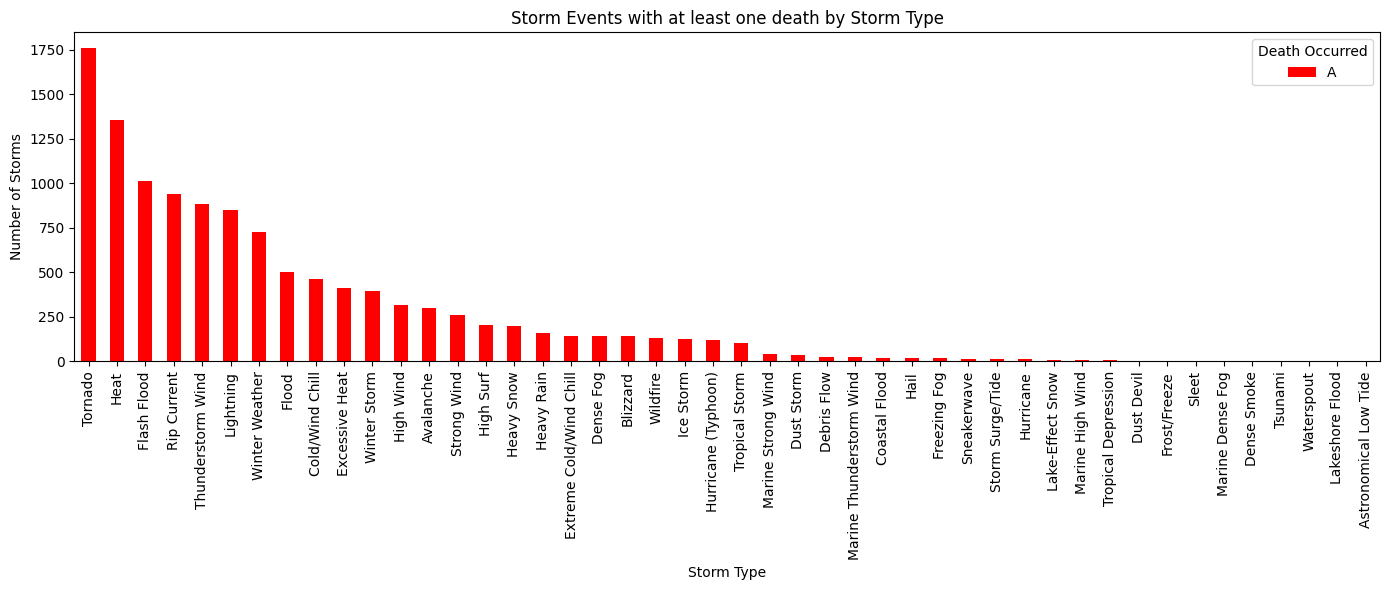

In [6]:
# Plot a graph that shows how many storms caused at least one death for each storm type.
temp_df = storm_events_df[storm_events_df['ANY_DEATHS'] == 1]
death_counts = temp_df.groupby(['EVENT_TYPE', 'ANY_DEATHS']).size().unstack(fill_value=0)

# Sort by total storms (descending)
death_counts = death_counts.sort_values(by=1, ascending=False)

# Plotting the final graph
ax = death_counts.plot(kind='bar', stacked=False, figsize=(14, 6), color='red')

plt.title('Storm Events with at least one death by Storm Type')
plt.xlabel('Storm Type')
plt.ylabel('Number of Storms')
plt.xticks(rotation=90)
plt.legend('At Least One Death', title='Death Occurred')
plt.tight_layout()
plt.show()

_Conclusion:_
The P-Value = 0.0 < 0.05 so we reject the null hypothesis, since there is significant evidence against it. Therefore, we can say that there is a significant relationship between the type of storm event and wheather or not someone died, meaning that some storms are far more likely to cause deaths than others. We have a graph above as well that shows which types of storms have the most deaths related to them to back them up. As the graph below shows, some storm events (such as tornadoes and Thunderstorms) are far more likely to cause deaths than others. Keep in mind that Hurricanes weren't labeled as such until 2020.

*Question 2: Has the average total damage inflicted by a storm increased since 1985? (Alpha Value = 0.05)*
Null Hypothesis ($H_0$): The average total damage caused by a storm has not changed since 1985.
Alternative Hypothesis ($H_1$): The average total damage caused by a storm has changed (increased) significantly since 1985

_Storm Damage Cost by Year_

We calculated total yearly damage by summing `DAMAGE_PROPERTY` and `DAMAGE_CROPS` for each year.

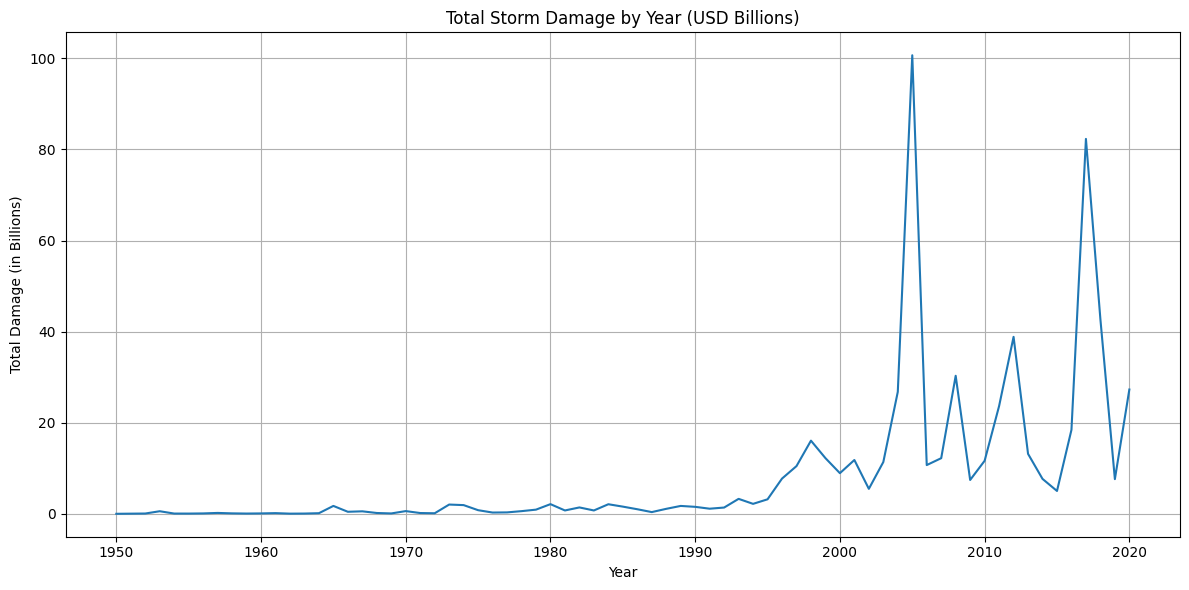

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

storm_events_df['TOTAL_DAMAGE'] = storm_events_df['DAMAGE_PROPERTY'] + storm_events_df['DAMAGE_CROPS']

yearly_damage = storm_events_df.groupby('YEAR')['TOTAL_DAMAGE'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_damage['YEAR'], yearly_damage['TOTAL_DAMAGE'] / 1e9)
plt.title('Total Storm Damage by Year (USD Billions)')
plt.xlabel('Year')
plt.ylabel('Total Damage (in Billions)')
plt.grid(True)
plt.tight_layout()
plt.show()

*T-Test: Before vs After 1985*

We compared average annual damages from 1950–1984 vs 1985–2020.

In [8]:
import scipy.stats as stats

# Compare two years, for example: 1950-1984 vs 1985-2020
group1 = yearly_damage[(yearly_damage['YEAR'] < 1985)]['TOTAL_DAMAGE']
group2 = yearly_damage[(yearly_damage['YEAR'] >= 1985)]['TOTAL_DAMAGE']

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("T-test statistic:", t_stat)
print("P-value:", p_value)

T-test statistic: -4.238555833402713
P-value: 0.0001552734569460187


*Conclusion*

The p-value of 0.00015 allows us to reject the null hypothesis, indicating that average annual storm-related damages in the U.S. have significantly increased since 1985. This rise may be driven by a combination of factors, including the growing frequency and severity of extreme weather events due to climate change, increased urban development that places more valuable property in harm’s way, and improved reporting standards that capture more damage details. Additionally, inflation and rising property values mean that similar levels of destruction today result in much higher financial losses than in the past. Together, these trends suggest a clear escalation in the economic impact of storms over the last several decades.

*Question 3: Has the number of storms increased over the years, and are there any outliers?*

We put together the following graph to see if there were any outliers in the number of storms that were recorded in this database per year.
Null Hypothesis ($H_0$): The number of storms per year has not changed significantly over time.
Alternative Hypothesis ($H_1$): The number of storms per year has changed significantly over time.

Years with outlier storm counts:
    YEAR  STORM_COUNT
18  1968         3312
24  1974         5375
25  1975         4975
58  2008        71190
61  2011        79091


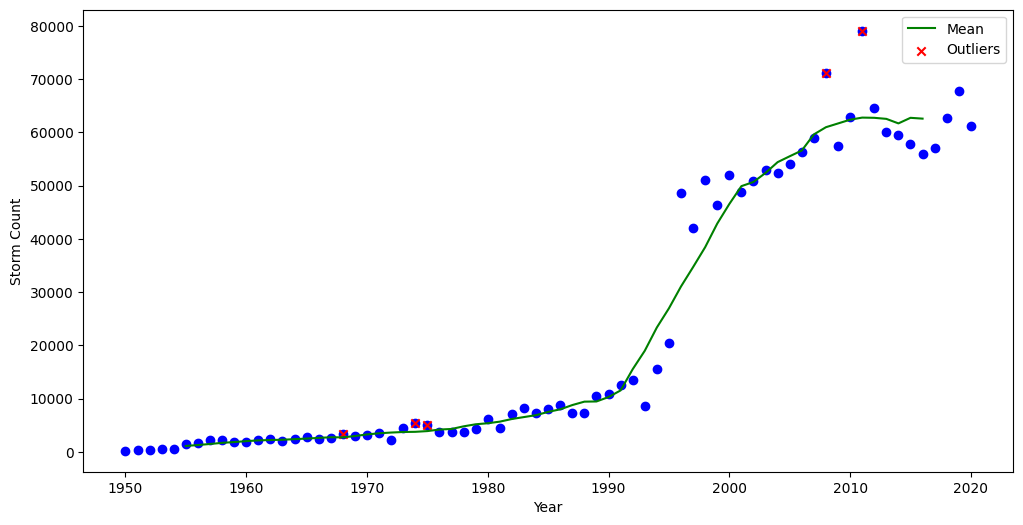

In [9]:
import matplotlib.pyplot as plt
yearly_storm_counts = storm_events_df.groupby('YEAR').size().reset_index(name='STORM_COUNT')
w = 10
yearly_storm_counts['mean'] = yearly_storm_counts['STORM_COUNT'].rolling(window=w, center=True).mean()
yearly_storm_counts['std'] = yearly_storm_counts['STORM_COUNT'].rolling(window=w, center=True).std()

yearly_storm_counts['IS_OUTLIER'] = yearly_storm_counts['STORM_COUNT'] > (yearly_storm_counts['mean'] + 1 * yearly_storm_counts['std'])
outliers = yearly_storm_counts[yearly_storm_counts['IS_OUTLIER']]
print("Years with outlier storm counts:")
print(outliers[['YEAR', 'STORM_COUNT']])
plt.figure(figsize=(12, 6))
plt.scatter(yearly_storm_counts['YEAR'], yearly_storm_counts['STORM_COUNT'], color='blue', marker='o')
plt.plot(yearly_storm_counts['YEAR'], yearly_storm_counts['mean'], color='green', label='Mean')
plt.scatter(outliers['YEAR'], outliers['STORM_COUNT'], color='red', marker='x', label='Outliers')
plt.xlabel('Year')
plt.ylabel('Storm Count')
plt.legend()
plt.show()

_Conclusion_

We grouped the storm events by year and calculated a rolling mean over 10 years. We did this to identify any outlier data points to potentially remove them for more consistent data. The plot shows the mean, yearly storm counts, and outliers. This allows us to easily see that the number of storms has drastically increased and we can see how consistent the data is. With this, we can reasonably reject the null hypothesis and say that the number of storms per decade has increased over the last 70 years.


# Primary Analysis Setup #

Finally, we can spend the rest of our tutorial creating the best predictive models for our data, which will let us predict how the average damages caused by the storms will change in the coming years (which, obviously, is outside the scope of the data we have).

For this tutorial, we will use a Polynomial Regression Model, and that's for a couple of reasons. Firstly, what we're trying to do, i.e. track the pattern in how the damages caused by storms have changed over the years, fits a regression model much more than a classification model, since we want to predict continuous outputs during a specific year, like the number of deaths or injuries, or the total economic cost caused by property damage. Secondly, a Polynomial Regression model provides lets us deal with more non-linear relationships between variables, letting us more accurately predict the target feature and the line of best fit for our plots.

Below, we've created a function that will create a Polynomial Regression Model, fit the model to the training data, predict the output, and creating a plot of the results in order to visualize the pattern created.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def runPolyRegression(X, Y, xlabel, ylabel, title, outliers_removed, degree):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if outliers_removed == True:
        print("Without Outliers:")

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')

    plt.scatter(X, Y,  color='black', label='Actual Yearly Data')

    x_vals = X_test.values.flatten()
    sorted_idx = x_vals.argsort()

    x_sorted = x_vals[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=3, label='Line of Best Fit')

    plt.legend(loc='upper left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

We also created a function that eliminates outliers in the data, so we can also create run the model on the data without any outliers, and see if the outliers are potentially skewing the results of the Regression models because of bias.

In [11]:
def remove_outliers(X, Y):
    z_scores = np.abs(stats.zscore(X)) # Find the absolute value for all of the z-scores for each value in the data column.
    threshold_z = 2
    # If the z-score for a data sample falls outside of the range (is more than 2 std. deviations from the mean), it is considered and outlier and is removed.
    outlier_indices = np.where(z_scores > threshold_z)[0]
    no_outliers_X = X.drop(outlier_indices)
    no_outliers_Y = Y.drop(outlier_indices)
    return no_outliers_X, no_outliers_Y

# Primary Analysis and Visualization #

In order to find and visualize the patterns between each of the major damage metrics (injuries, deaths, property damage, etc), we decided to run a random forest regression model to find the line of best fit between the year the major storms took place in and the total sum of each of those damage metrics over that year. This would hopefully give us a very accurate line of best fit that we can use to predict future damage values.

In [12]:
# Split up the individual data columns we're going to track and find the average value for each year by using 'groupby' to aggregate based on year.
yearly_indirect_injuries = storm_events_df.groupby('YEAR', as_index=False)['INJURIES_INDIRECT'].sum().iloc[:, 1]
yearly_direct_injuries = storm_events_df.groupby('YEAR', as_index=False)['INJURIES_DIRECT'].sum().iloc[:, 1]
yearly_total_injuries = storm_events_df.groupby('YEAR', as_index=False)['INJURIES_TOTAL'].sum().iloc[:, 1]
yearly_indirect_deaths = storm_events_df.groupby('YEAR', as_index=False)['DEATHS_INDIRECT'].sum().iloc[:, 1]
yearly_direct_deaths = storm_events_df.groupby('YEAR', as_index=False)['DEATHS_DIRECT'].sum().iloc[:, 1]
yearly_total_deaths = storm_events_df.groupby('YEAR', as_index=False)['DEATHS_TOTAL'].sum().iloc[:, 1]
yearly_property_damage = storm_events_df.groupby('YEAR', as_index=False)['DAMAGE_PROPERTY'].sum().iloc[:, 1]
yearly_crop_damage = storm_events_df.groupby('YEAR', as_index=False)['DAMAGE_CROPS'].sum().iloc[:, 1]
yearly_total_damage = storm_events_df.groupby('YEAR', as_index=False)['TOTAL_DAMAGE'].sum().iloc[:, 1]

# List of years from 1950 to 2020 that we are measuring (acts as the X value for the regression models.
years = pd.DataFrame(storm_events_df['YEAR'].drop_duplicates()).reset_index(drop=True)
print(years.head())
print(yearly_indirect_injuries)

   YEAR
0  1950
1  1951
2  1952
3  1953
4  1954
0       0
1       0
2       0
3       0
4       0
     ... 
66    281
67    758
68    401
69    511
70    372
Name: INJURIES_INDIRECT, Length: 71, dtype: int64


_Indirect Injuries:_

Mean Squared Error: 45928.268397639804
R-squared: 0.3162403649747729


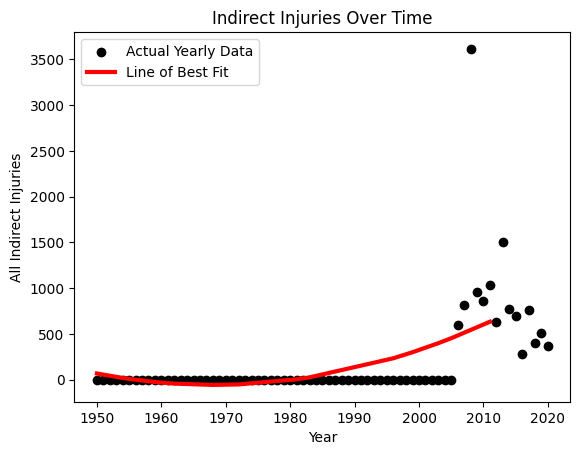

In [13]:
runPolyRegression(years, yearly_indirect_injuries, 'Year', 'All Indirect Injuries', 'Indirect Injuries Over Time', False, 2)

Without Outliers:
Mean Squared Error: 21354.802443032528
R-squared: 0.5646772393773791


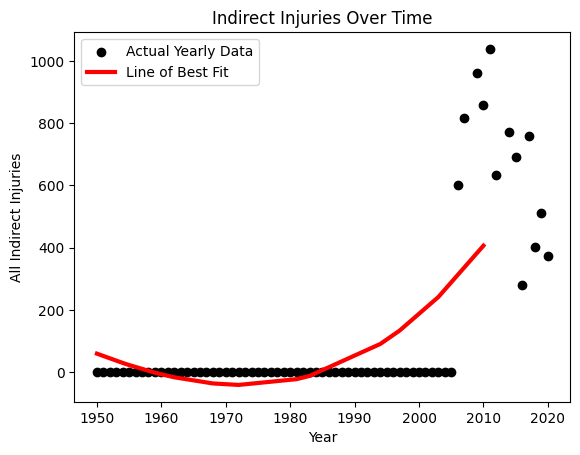

In [14]:
new_yearly_indirect_injuries, new_years = remove_outliers(yearly_indirect_injuries, years)
runPolyRegression(new_years, new_yearly_indirect_injuries, 'Year', 'All Indirect Injuries', 'Indirect Injuries Over Time', True, 4)

_Direct Injuries:_

Mean Squared Error: 4259307.3157684235
R-squared: 0.11535681852024626


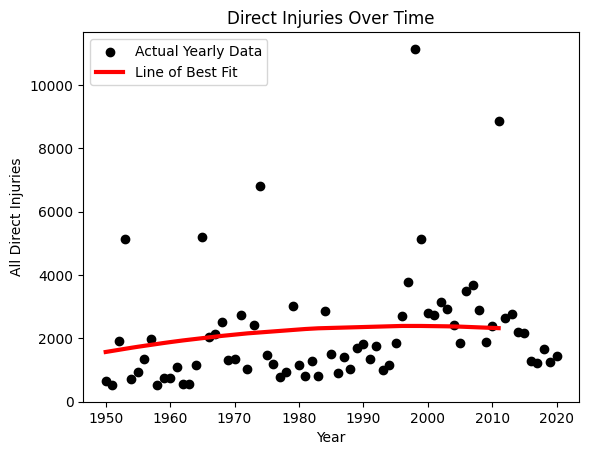

In [15]:
runPolyRegression(years, yearly_direct_injuries, 'Year', 'All Direct Injuries', 'Direct Injuries Over Time', False, 2)

Without Outliers:
Mean Squared Error: 1571498.404983692
R-squared: 0.0569411094901483


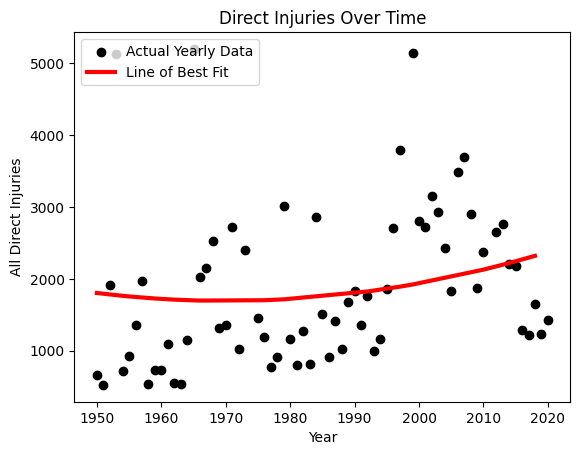

In [16]:
new_yearly_direct_injuries, new_years = remove_outliers(yearly_direct_injuries, years)
runPolyRegression(new_years, new_yearly_direct_injuries,  'Year', 'All Direct Injuries', 'Direct Injuries Over Time', True, 2)

_Total Injuries:_

Mean Squared Error: 4538299.8233628115
R-squared: 0.2206635080223015


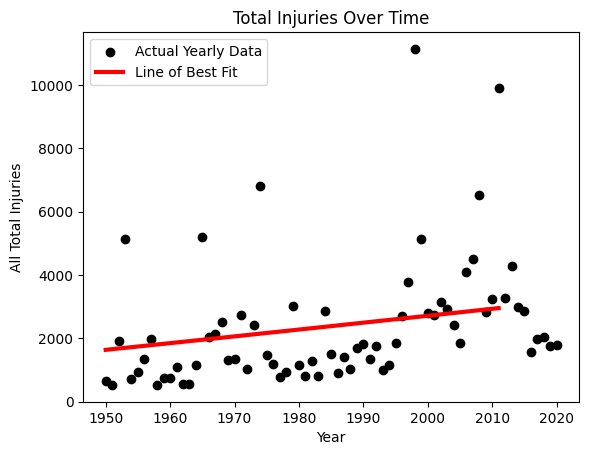

In [17]:
runPolyRegression(years, yearly_total_injuries, 'Year', 'All Total Injuries', 'Total Injuries Over Time', False, 2)

Without Outliers:
Mean Squared Error: 796263.6038785335
R-squared: 0.31390279051520953


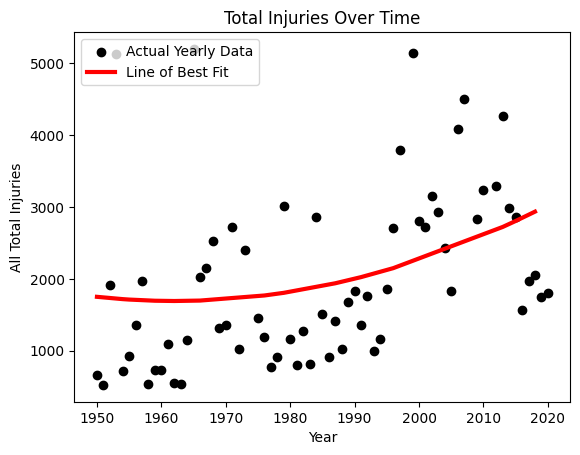

In [18]:
new_yearly_total_injuries, new_years = remove_outliers(yearly_total_injuries, years)
runPolyRegression(new_years, new_yearly_total_injuries, 'Year', 'All Total Injuries', 'Total Injuries Over Time', True, 2)

_Indirect Deaths:_

Mean Squared Error: 1544.8749702197613
R-squared: 0.5689522962556469


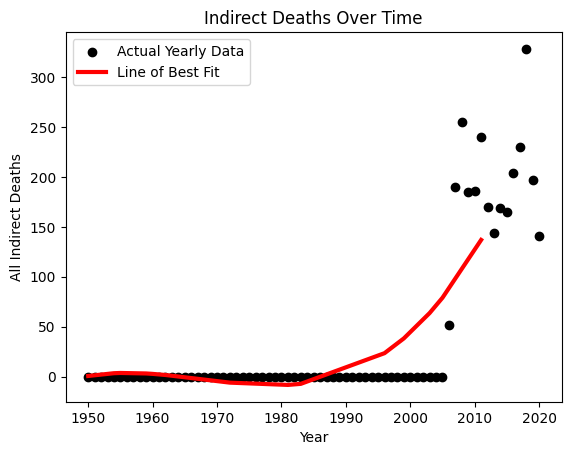

In [19]:
runPolyRegression(years, yearly_indirect_deaths, 'Year', 'All Indirect Deaths', 'Indirect Deaths Over Time', False, 3)

Without Outliers:
Mean Squared Error: 769.8504286761485
R-squared: 0.8592589943434059


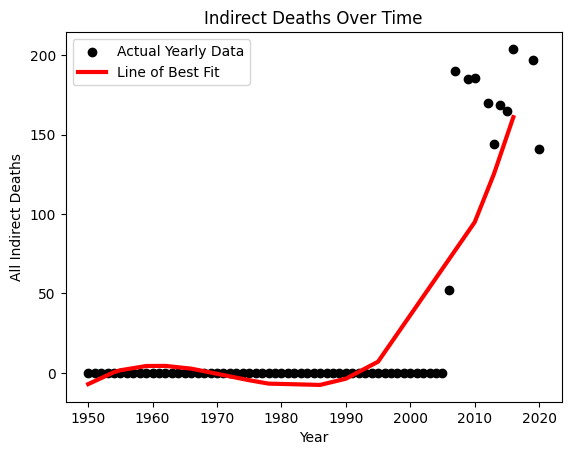

In [20]:
new_yearly_indirect_deaths, new_years = remove_outliers(yearly_indirect_deaths, years)
runPolyRegression(new_years, new_yearly_indirect_deaths, 'Year', 'All Indirect Deaths', 'Indirect Deaths Over Time', True, 3)

_Direct Deaths:_

Mean Squared Error: 138165.76418994024
R-squared: 0.3025371292118102


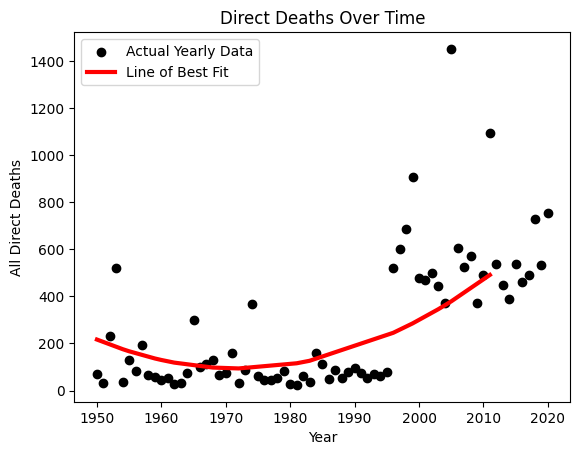

In [21]:
runPolyRegression(years, yearly_direct_deaths, 'Year', 'All Direct Deaths', 'Direct Deaths Over Time', False, 2)

Without Outliers:
Mean Squared Error: 21804.176012905333
R-squared: 0.6230806953141992


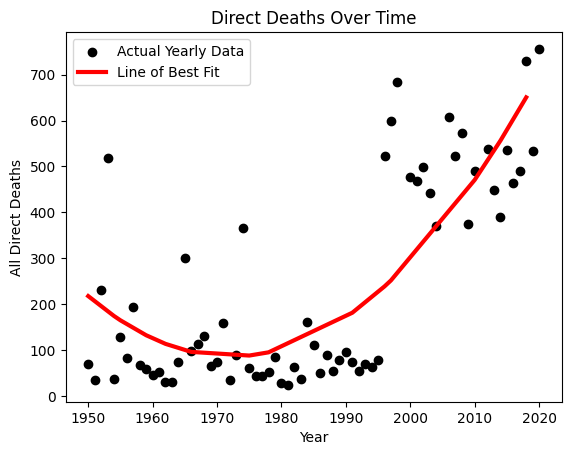

In [22]:
new_yearly_direct_deaths, new_years = remove_outliers(yearly_direct_deaths, years)
runPolyRegression(new_years, new_yearly_direct_deaths, 'Year', 'All Direct Deaths', 'Direct Deaths Over Time', True, 2)

_Total Deaths:_

Mean Squared Error: 128347.9353915341
R-squared: 0.43223230330143925


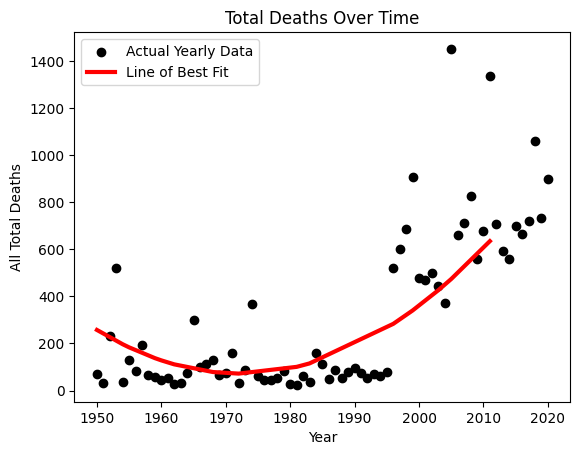

In [124]:
runPolyRegression(years, yearly_total_deaths, 'Year', 'All Total Deaths', 'Total Deaths Over Time', False, 2)

Without Outliers:
Mean Squared Error: 17388.024577684668
R-squared: 0.7403345002689039


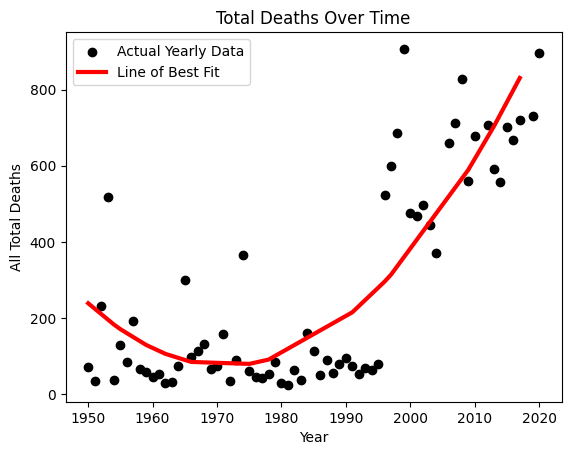

In [23]:
new_yearly_total_deaths, new_years = remove_outliers(yearly_total_deaths, years)
runPolyRegression(new_years, new_yearly_total_deaths, 'Year', 'All Total Deaths', 'Total Deaths Over Time', True, 2)

_Property Damage:_

Mean Squared Error: 4.887513993266863e+20
R-squared: 0.14698464909248354


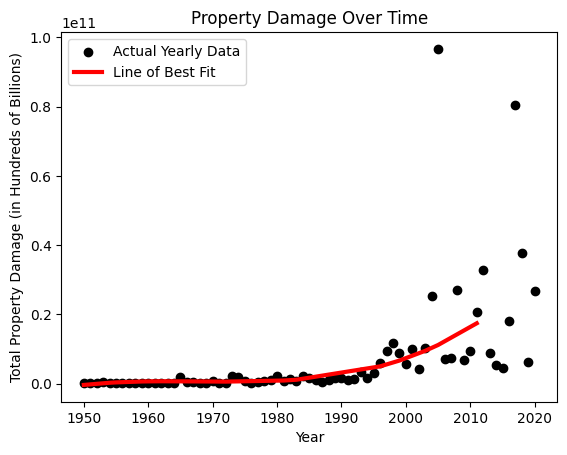

In [24]:
runPolyRegression(years, yearly_property_damage, 'Year', 'Total Property Damage (in Hundreds of Billions)', 'Property Damage Over Time', False, 3)

Without Outliers:
Mean Squared Error: 3.1567212226966636e+18
R-squared: 0.7883035790674228


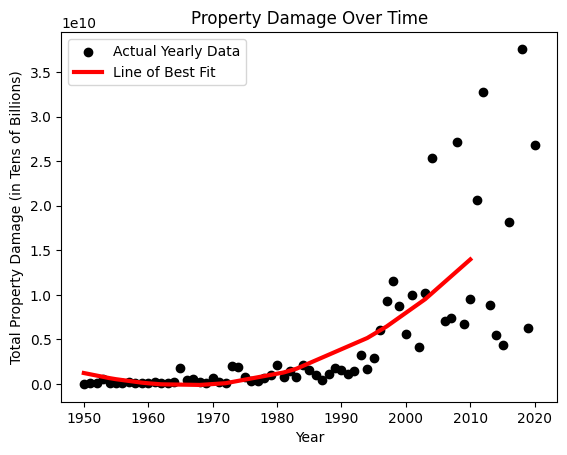

In [25]:
new_yearly_property_damage, new_years = remove_outliers(yearly_property_damage, years)
runPolyRegression(new_years, new_yearly_property_damage, 'Year', 'Total Property Damage (in Tens of Billions)', 'Property Damage Over Time', True, 3)

_Crop Damage:_

Mean Squared Error: 7.78429298269117e+17
R-squared: 0.6119012912802682


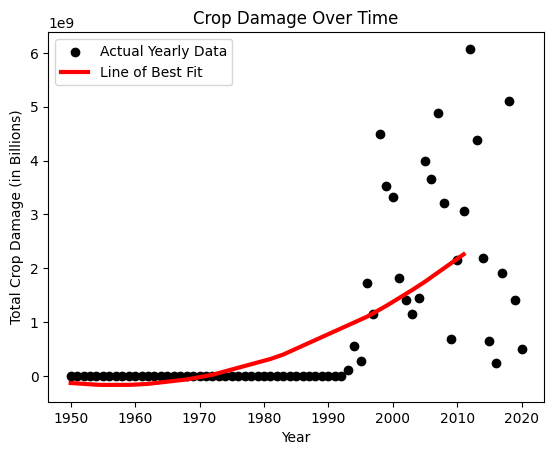

In [26]:
runPolyRegression(years, yearly_crop_damage, 'Year', 'Total Crop Damage (in Billions)', 'Crop Damage Over Time', False, 2)

Without Outliers:
Mean Squared Error: 1.3119529669250721e+18
R-squared: -0.10617341808337422


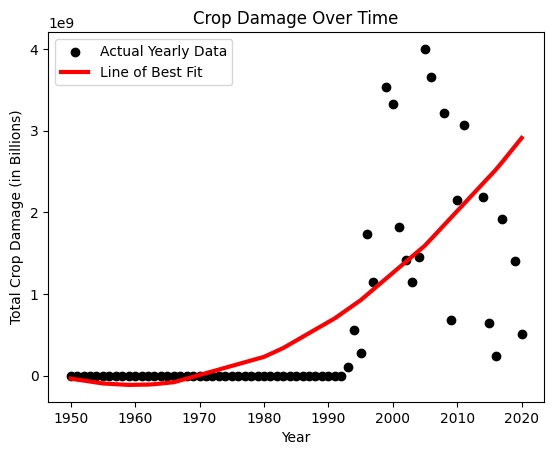

In [27]:
new_yearly_crop_damage, new_years = remove_outliers(yearly_crop_damage, years)
runPolyRegression(new_years, new_yearly_crop_damage, 'Year', 'Total Crop Damage (in Billions)', 'Crop Damage Over Time', True, 2)

_Total Economic Damage:_

Mean Squared Error: 5.1115784771618046e+20
R-squared: 0.18173297705305547


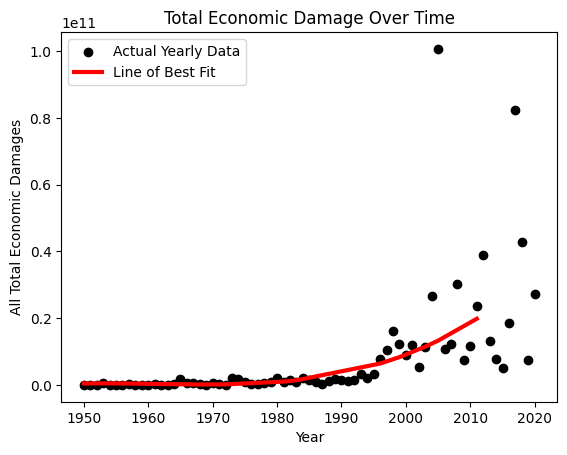

In [28]:
runPolyRegression(years, yearly_total_damage, 'Year', 'All Total Economic Damages', 'Total Economic Damage Over Time', False, 3)

Without Outliers:
Mean Squared Error: 4.5424671749066826e+19
R-squared: 0.5886697281963519


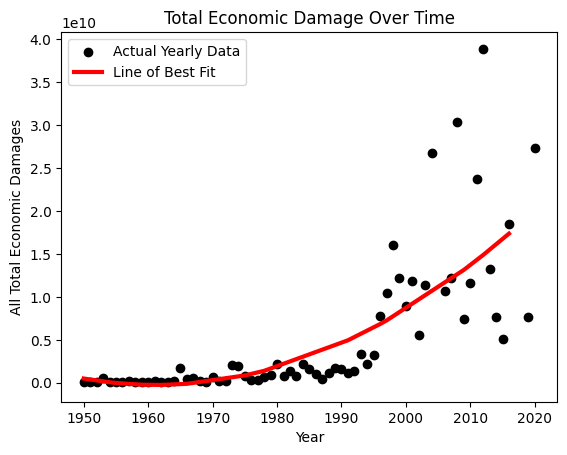

In [29]:
new_yearly_total_damage, new_years = remove_outliers(yearly_total_damage, years)
runPolyRegression(new_years, new_yearly_total_damage, 'Year', 'All Total Economic Damages', 'Total Economic Damage Over Time', True, 2)

Next up, we'll implement a function that will not only recreate the regression line for each of the main damage types, (injuries, deaths, and economic costs) but also extrapolate further into the future from there, predicting the what the damages will be in 2025, 2030, 2035, 2040, 2045, and even 2050.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def runPolyFuture(X, Y, xlabel, ylabel, title, outliers_removed, degree, words):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if outliers_removed == True:
          print("Without Outliers:")
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error: {mse}')

  r2 = r2_score(y_test, y_pred)
  print(f'R-squared: {r2}')

  plt.scatter(X, Y,  color='black', label='Actual Yearly Data')

  x_vals = X_test.values.flatten()
  sorted_idx = x_vals.argsort()

  x_sorted = x_vals[sorted_idx]
  y_pred_sorted = y_pred[sorted_idx]
  plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=3, label='Line of Best Fit')

  pred_2025 = model.predict(np.array([[2025]]))[0]
  pred_2030 = model.predict(np.array([[2030]]))[0]
  pred_2035 = model.predict(np.array([[2035]]))[0]
  pred_2040 = model.predict(np.array([[2040]]))[0]
  pred_2045 = model.predict(np.array([[2045]]))[0]
  pred_2050 = model.predict(np.array([[2050]]))[0]
  print(words)
  print("2025: ", pred_2025)
  print("2030: ",pred_2030)
  print("2035: ",pred_2035)
  print("2040: ",pred_2040)
  print("2045: ",pred_2045)
  print("2050: ",pred_2050)

  plt.scatter([2025, 2030, 2035, 2040, 2045, 2050], [pred_2025, pred_2030, pred_2035, pred_2040, pred_2045, pred_2050], color='blue', marker='X', s=100, label='Future Predictions')

  plt.legend(loc='upper left')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()


Mean Squared Error: 5.1115784771618046e+20
R-squared: 0.18173297705305547
Projected Economic Damage
2025:  42618218896.25
2030:  53701727840.5
2035:  66541325668.25
2040:  81264409704.5
2045:  97998377274.75
2050:  116870625704.25


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.1

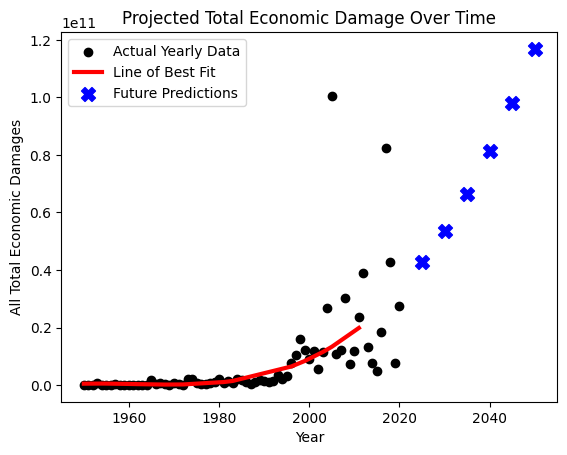

In [31]:
runPolyFuture(years, yearly_total_damage, 'Year', 'All Total Economic Damages', 'Projected Total Economic Damage Over Time', False, 3, "Projected Economic Damage")

Without Outliers:
Mean Squared Error: 17388.024577684668
R-squared: 0.7403345002689039
Projected Total Deaths
2025:  1118.6613777084276
2030:  1322.1907136507798
2035:  1543.8266745884903
2040:  1783.5692605222575
2045:  2041.4184714511503
2050:  2317.3743073763326


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.1

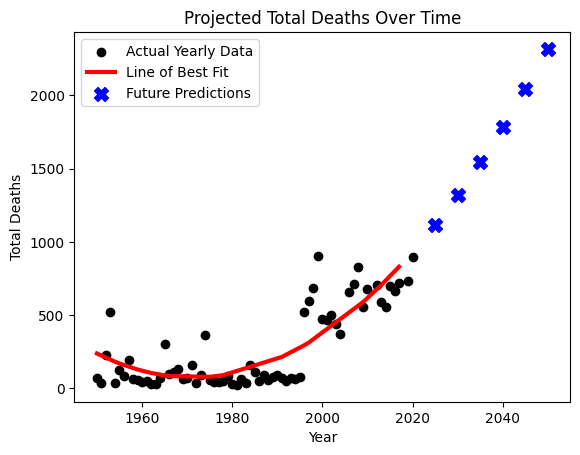

In [32]:
new_yearly_total_deaths, new_years = remove_outliers(yearly_total_deaths, years)
runPolyFuture(new_years, new_yearly_total_deaths, 'Year', 'Total Deaths' , 'Projected Total Deaths Over Time', True, 2, "Projected Total Deaths")


Without Outliers:
Mean Squared Error: 796263.6038785335
R-squared: 0.31390279051520953
Projected Total Injuries
2025:  3264.3604287924245
2030:  3524.4086892595515
2035:  3804.3374592708424
2040:  4104.146738826064
2045:  4423.836527924985
2050:  4763.406826568302


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.1

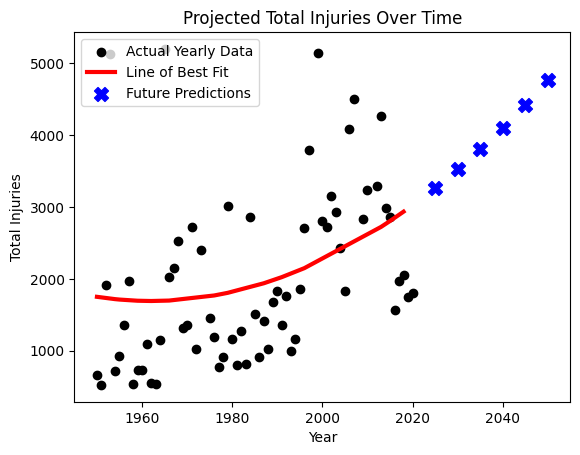

In [33]:
new_yearly_total_injuries, new_years = remove_outliers(yearly_total_injuries, years)
runPolyFuture(new_years, new_yearly_total_injuries, 'Year', 'Total Injuries', 'Projected Total Injuries Over Time', True, 2, "Projected Total Injuries")

# Insights and Conclusions #

From looking at the looking at the results and visualizations we've created using out polynomial regression machine learning algorithm, we can come to a couple of main conclusions about how the damage caused by storms in the U.S. has changed since 1950.

Firstly, from looking at our plots on how the total yearly amount for each type of damage has changed from year to year and the regression lines we created from them, we can see that every single type of damage caused by major storms in the U.S has been on an upward trajectory since 1950, or at the very least since 1970. This means that major storms have, on average, been steadily killing more people, injuring more people, and causing more and more property/crop damage since as the years have passed since 1950. This is especially clear when looking at the total economic damages caused by the storms: where even though the regression line seems to have a small upward slope, that is only because the numbers were so large that they had to be truncated. If we look at the actial value of the numbers, we can see that the true total costs have been increasing by tens of billions of dollars over the years.

Secondly, and more imporantly: from looking at our plots for the projected yearly amount of damages in the future, we can also see that this upward trend isn't going to slow down anytime soon. In fact, the total cost in lives, injuries, and plain dollars will only continue to rise at an even faster rate. By 2050, we project that as many as 4800 people will be injured, 2300 people will be killed, and $120 billion will be spent every year because of these storms.

These final insights provided by the data provided by the U.S. storm events database, and our very own machine learning model, answer the question we set forward at the beginning of this tutorial. Major storms in the U.S., and mostly likely around the world, have grown more and more destructive over the last few decades, and they will continue to do so over the coming years. Even if you personally disagree with the cause, that much is clear. If something isn't done to reverse the damages to our global climate caused by Climate Change, we will ultimately spend more lives and money dealing with the consequences than we ever would by switching to renewable resources. 

Ultimately, we hope that someone who was uninformed about the growing power and destructiveness of major storms all around the world can look at this tutorial and learn more about the true effects of climate change around the world. If they arlready know all about this topic, then we also hope that they learned at least a little bit more about how the Python programming language, Exploratory Data Analysis, and Polynomial Regression models can be used to work with data, and answer questions about this topic themselves.

## THE END ##